## Preparation of r/news data by Nicholas Osaka

This data comes from the Kaggle dataset [May 2015 Reddit Comments](https://www.kaggle.com/reddit/reddit-comments-may-2015) which has over 30GB of data - all comments from the month of May 2015. This subset is 20,000 comments from the r/news subreddit.

In [1]:
import numpy as np
import pandas as pd
import nltk
import sklearn as sk
import re # regex
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/news-20k-comments.csv')
df.head()

,created_utc,ups,subreddit_id,link_id,name,score_hidden,author_flair_css_class,author_flair_text,subreddit,id,...,downs,archived,author,score,retrieved_on,body,distinguished,edited,controversiality,parent_id
0,1430438402,-11.0,t5_2qh3l,t3_34f1lq,t1_cqug92b,0.0,NaN,NaN,news,cqug92b,...,0.0,0.0,hogsucker,-11.0,1.432703e+09,1-She got to be a bigwig at Google by sleeping...,NaN,0.0,0.0,t1_cqu4t11
1,1430438407,1.0,t5_2qh3l,t3_34exjb,t1_cqug96h,0.0,NaN,NaN,news,cqug96h,...,0.0,0.0,flal4,1.0,1.432703e+09,For those about to lynch this guy [here](http:...,NaN,0.0,1.0,t1_cqudz0p
2,1430438439,4.0,t5_2qh3l,t3_34f10p,t1_cqug9tk,0.0,NaN,NaN,news,cqug9tk,...,0.0,0.0,HitachinoBia,4.0,1.432703e+09,It feels like black people are the most racist...,NaN,0.0,1.0,t1_cqufsip
3,1430438448,0.0,t5_2qh3l,t3_34cvvg,t1_cquga1l,0.0,NaN,NaN,news,cquga1l,...,0.0,0.0,[deleted],0.0,1.432703e+09,[deleted],NaN,0.0,0.0,t3_34cvvg
4,1430438449,-10.0,t5_2qh3l,t3_34e7eo,t1_cquga1v,0.0,NaN,NaN,news,cquga1v,...,0.0,0.0,Cultiststeve,-10.0,1.432703e+09,Its because otherwise thats all that would app...,NaN,0.0,0.0,t1_cqudxkr


In [3]:
all_comments = df['body'] # put all the comment bodies into a pandas DataFrame
all_comments.describe()

count         20000
unique        17491
top       [deleted]
freq           2468
Name: body, dtype: object

We can see that the most frequent comment is "[deleted]" which we need to remove.

In [4]:
# deleted comments Series
deleted_comments = all_comments[all_comments == "[deleted]"]
deleted_comments.describe()

count          2468
unique            1
top       [deleted]
freq           2468
Name: body, dtype: object

In [5]:
# valid comments!
comments = all_comments.drop(deleted_comments.index)
comments = comments.to_frame().reset_index(drop=True).astype('str')
comments.head()

,body
0,1-She got to be a bigwig at Google by sleeping...
1,For those about to lynch this guy [here](http:...
2,It feels like black people are the most racist...
3,Its because otherwise thats all that would app...
4,Please go to Facebook and comment and post on ...


In [6]:
comments['body'][1]

'For those about to lynch this guy [here](http://ne.reddit.com/r/PoliticalDiscussion/comments/2t21p7/the_supreme_courts_billion_dollar_mistake_article/cnuzsv9) is a short and sweet write up that sides with citizens united'

In [7]:
# clean out any urls and and brackets, parenthesis and hyphens, leaving only alphanumeric words
url_regex = r"([--:\w?@%&+~#=]*\.[a-z]{2,4}\/{0,2})((?:[?&](?:\w+)=(?:\w+))+|[--:\w?@%&+~#=]+)?"
special_character_regex = r"[\"'()[\]]"

#remove urls, special characters, and replace hyphens with a space
comments['clean'] = comments['body'].apply(lambda text: text.strip().lower()).apply(lambda text: re.sub(url_regex, '', text)).apply(lambda text: re.sub(special_character_regex, '', text)).apply(lambda text: re.sub(r"-", ' ', text))
comments['clean'].head()

0    1 she got to be a bigwig at google by sleeping...
1    for those about to lynch this guy here is a sh...
2    it feels like black people are the most racist...
3    its because otherwise thats all that would app...
4    please go to facebook and comment and post on ...
Name: clean, dtype: object

In [8]:
comments['tokens'] = comments['clean'].apply(lambda text: re.sub(r"[.,!?]"," ", text)).apply(lambda text: re.sub(r"[0-9]", " ", text)).apply(nltk.wordpunct_tokenize)

In [9]:
comments

,body,clean,tokens
0,1-She got to be a bigwig at Google by sleeping...,1 she got to be a bigwig at google by sleeping...,"[she, got, to, be, a, bigwig, at, google, by, ..."
1,For those about to lynch this guy [here](http:...,for those about to lynch this guy here is a sh...,"[for, those, about, to, lynch, this, guy, here..."
2,It feels like black people are the most racist...,it feels like black people are the most racist...,"[it, feels, like, black, people, are, the, mos..."
3,Its because otherwise thats all that would app...,its because otherwise thats all that would app...,"[its, because, otherwise, thats, all, that, wo..."
4,Please go to Facebook and comment and post on ...,please go to facebook and comment and post on ...,"[please, go, to, facebook, and, comment, and, ..."
...,...,...,...
17531,"""Frustrating"" the police can get them to kick ...",frustrating the police can get them to kick yo...,"[frustrating, the, police, can, get, them, to,..."
17532,I didn't just make it up. That description of ...,i didnt just make it up. that description of w...,"[i, didnt, just, make, it, up, that, descripti..."
17533,"You are correct, edit to say it would be uneth...","you are correct, edit to say it would be uneth...","[you, are, correct, edit, to, say, it, would, ..."
17534,This seems... appropriate.,this seems... appropriate.,"[this, seems, appropriate]"


## Decisions when cleaning and preparing data

For this analysis, we chose to remove markdown syntax as well as URLs. This is because they're not really important for forming new sentences for that subreddit, as valid markdown can just be text. Let's see the choices used for each DataFrame columns and why!

- body - This column is the original markdown source text. It's less than 20k because we remove any comments that are deleted.
- clean - This column strips whitespace at the beginning and ending of the body text, then converts to lowercase. We then remove URLs and markdown special characters such as `[`,`]`, and `(`,`)` characters. We also remove `-` characters but replace with a space, since hyphens act similar to a space syntactically.
- tokens - This column simply uses the `wordpunct_tokenize` method and seperates the clean column into a list. Before tokenizing, we strip any punctuation! We don't need punctuation for analysis on this part, as we're going to use the `tokens` column to analyse token frequency, uniqueness, and other metrics.

We'll use the `clean` column when separating the sentences into n-grams later, which is why we don't include `<START>` and `<STOP>` here, as this is just preprocessing and exploratory analysis, not building linguistic models.

### Graphs!

In [10]:
all_words = [token for sentence in comments['tokens'] for token in sentence]

In [11]:
freqdist = nltk.FreqDist(all_words)
freqdist

FreqDist({'the': 31349, 'to': 18666, 'a': 16896, 'and': 13809, 'of': 12339, 'that': 10960, 'is': 9896, 'in': 9641, 'i': 8700, 'you': 8667, ...})

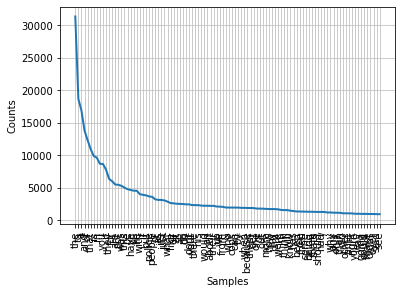

In [12]:
freqdist.plot(100)

We can see that our corpus follows zipfs law, and that when plotting the top 100 words, we have a little ledge between 10,000 occurances and 5,000 occurances, and this is where pronouns such as `i` and `you` live:

In [13]:
print("Number of occurances of 'I':", freqdist['i'])
print("Number of occurances of 'You':", freqdist['you'])

Number of occurances of 'I': 8700
Number of occurances of 'You': 8667


In [14]:
unique_words = []
for word in all_words:
    if word not in unique_words:
        unique_words.append(word)

print("Total words: ", len(all_words))
print("Unique words: ", len(unique_words))
print("Words that only occur once: ", len([word for word in all_words if freqdist[word] == 1]))

Total words:  679419
Unique words:  21438
Words that only occur once:  8639


We have nearly 68k words in our dataset, and just over than 21k unique words. We also see that 8.6k words occur only once!

However, let's also note that some of these unique words are mis-spellings! This is a dataset that's imperfect, and reflects how people type and communicate.

In [15]:
avg_len_chars = 0
for comment in comments['clean']:
    avg_len_chars += len(comment)
avg_len_chars /= len(comments)

avg_len_words = 0
for comment in comments['tokens']:
    avg_len_words += len(comment)
avg_len_words /= len(comments)

In [16]:
print("Avg length of comment (characters): ", avg_len_chars)
print("Avg length of comment (words): ", avg_len_words)
print("Avg length of word: ", avg_len_chars/avg_len_words)

Avg length of comment (characters):  211.65419708029196
Avg length of comment (words):  38.74424041970803
Avg length of word:  5.462855763527367


We can see that the average length of a comment is 38.7 words, or 211.6 characters. This means that the average word length is 5.4 characters. You can image that this is true because most of the words in the top 20 most frequent words in our list are short, around 1-4 characters in length.

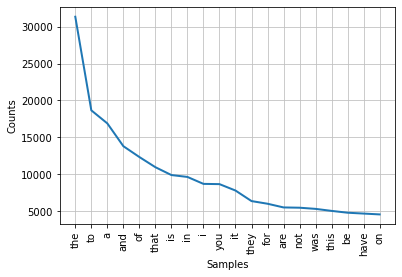

In [17]:
freqdist.plot(20)